# Assignment 3

**Due date:** Wednesday 13th September, 23:59

**Computer info:** MacBook Air, Chip: Apple M1, Ram: 8GB, macOs 13.4.1, 2020

**Note:** Some experiments are quite computationally intensive, so they may take a while.

<div class="alert alert-warning">
    <strong>Instructions for Cell Execution:</strong>

1. Execute the cell under "Used Libraries as first".
2. Run the cells in the order they appear.
3. At the end of exercises, there is an extra part that explains some of my choices (**You can skip it!!**).
</div>

----
----


# Used libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from random import random,expovariate
import time
from scipy.sparse import csr_matrix#in point 1b is necessary

# Change palette
import seaborn as sns
from matplotlib import colors
sns.set(rc={"axes.facecolor": "#FAEBD7", "figure.facecolor": "#FFEFDB"})

----
----
----
----
----
----
## Exercise 1

> A travelling salesman has carpets in his van. He goes from door to door trying to sell them.
Each time he sells one, he gets excited and is able to be more convincing, and each time he
is rejected and cannot close a deal, he gets less excited and is less convincing when dealing
with the next customer. This salesman was blessed with 10 levels of excitement, and each
interaction either lifts or decreases his excitement by one level. The probabilities for the
salesman to sell a carpet depending on how he feels are {0, 0.1, 0.2, 0.3, …0.9}. Write an
algorithm to simulate this Markov chain. In b) - f), run simulations for all initial levels of
excitement, except the first level, because business is downright non-existent when one
feels this low for starters. Use one bin per timestep. Run simulations over the time period
(sales events) of T=1000. For statistics, run 10,000 simulations, which in the present
story means that the salesman makes 10,000 trips.

### Understanding Markov Chains

To grasp the concept of Markov Chains effectively, it's crucial to revisit their core principles. A discrete Markov Chain is a stochastic process denoted as $\{X_n\}_{n\in\mathbb{N}}$, where the process takes values from a discrete set $S$. The fundamental concept lies in the Markovian Property, which holds true when the probability of transitioning to a future state depends solely on the current state and not on the entire history of states leading up to it.

**Transition Probability**

The conditional probability of transitioning from state 'i' to state 'j' in a single step, often denoted as $p_{ij}$, is referred to as the 'transition probability.' It can be expressed as:

$$p_{ij} =\mathbb{P}(X_n=j|X_{n-1}=i)$$

**Transition Matrix**

All these transition probabilities are organized into a matrix known as the 'transition matrix,' represented as 'P.' This matrix belongs to the set of real numbers $\mathbb{R}^{|S|\times|S|}$, where $|S|$ represents the size of the state space 'S.' The transition matrix encapsulates the probabilities associated with transitioning between different states within the Markov Chain.

**Components Defining a Markov Chain**

A Markov Chain can be entirely defined by three essential components:

1. **Initial Distribution:** This describes the probabilities associated with the starting state or initial conditions of the chain.

2. **Transition Matrix:** This matrix captures the transition probabilities between all possible pairs of states within the chain.

3. **State Space:** This represents the set of all possible states that the chain can assume.

Together, these components provide a comprehensive description of the Markov Chain and enable the analysis of its behavior and dynamics over time.

----
----
### Point a

Let's introduce a formal state space for the transition process: ($S = \{0, 1, \ldots, 9\}$), where each state corresponds to a level of excitement.

In this formalization, let \\(j\\) represent the current state. When the salesman makes a sale, the state can transition to \\(j+1\\) (if \\(j < 10\\)), or if there is no sale, the state transitions to \\(j-1\\) (if \\(j > 1\\)). In either case, the transition within the state space is limited to a single step, either upwards or downwards. However, there are exceptions:

- When the salesman is at the lowest excitement level, \\(j = 1\\), there is no possibility of transition; it is an *absorbing state*.
- Conversely, when the salesman is at the highest excitement level, \\(j = 10\\), the only possible transition is downwards to \\(j = 9\\).

This formal description aligns with the concept of a *birth and death process*, which is a specific type of Markov chain characterized by transitions between discrete states, with some states having unique transition rules as in your scenario.

Let \\(P\\) be the transition matrix:

$$
P=
\begin{bmatrix}
  1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
  0.1 & 0 & 0.9 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
  0 & 0.2 & 0 & 0.8 & 0 & 0 & 0 & 0 & 0 & 0 \\
  0 & 0 & 0.3 & 0 & 0.7 & 0 & 0 & 0 & 0 & 0 \\
  0 & 0 & 0 & 0.4 & 0 & 0.6 & 0 & 0 & 0 & 0 \\
  0 & 0 & 0 & 0 & 0.5 & 0 & 0.5 & 0 & 0 & 0 \\
  0 & 0 & 0 & 0 & 0 & 0.6 & 0 & 0.4 & 0 & 0 \\
  0 & 0 & 0 & 0 & 0 & 0 & 0.7 & 0 & 0.3 & 0 \\
  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0.8 & 0 & 0.2 \\
  0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0.9 & 0.1 \\
\end{bmatrix}
$$

In [3]:
P = np.array([
    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.9, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.8, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.7, 0.0, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.6, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.6, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.0, 0.7, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.8],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.9]
])

sell_prob=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

----
----
### Point b

>For every simulation of each initial level of excitement, compute the total
number of sold carpets by the end of the simulation (cumulative number of sales).
For each initial level of excitement plot as a normalised histogram (density=True)
the probability mass density (PMD) of the cumulative number of sales (9 histograms
in total). To make this clear, such a histogram has the cumulative number of sales on
the x-axis and the (normalised) frequency with which each number of cumulative
sales is realised in 10000 trials on the y-axis. Choose the appropriate scale to see the
PMD as clearly as possible.

In this point, we will run simulation of a Markov chain. It's important to note that, in the way the model is defined, the number of sales corresponds to how many times the Markov chain has transitioned upwards by one (+1). Additionally, we will exploit the structure of the problem to avoid accessing the matrix 'P' at each step.

We will define three functions to achieve our objectives:

1. **salesman**: This function simulates the Markov chain from a starting level over a specified time horizon. The function saves all transitions in order to avoid in the next part to compute them again

2. **salesman_simulations**: The second function performs several simulations for a fixed starting point and stores cumulative functions.

3. **hist_plot**: The last function runs simulations for every initial state and stores the means, which will be useful for the final analysis.

Let's dive into the implementation of these functions.

In [3]:
def salesman(current_state=9,time_horizon=1000):
    """
    Generates and plots normalized histograms of cumulative sales for different initial excitement levels.

    Args:
    - time_horizon (int): The maximum number of interactions (time steps) for each simulation.
    - num_simulations (int): The number of simulations to run for each initial excitement level.
    
    Sales:
    -sales(int): number of sales
    
    """
    
    sales=0
    t=0
    
    states_evolution=[]
    
    while current_state>0 and t<time_horizon+1:
        states_evolution.append(current_state)
        birth=sell_prob[current_state]
        death=1-birth
        
        temp=random()
        
        if temp<birth:
            step=1
            sales+=1
        else:
            step=-1

        current_state=min(9,current_state+step)
        t+=1
        #print(current_state)
        
     
    #plt.plot(np.arange(len(states_evolution)),states_evolution)
    #plt.show()
    
    return sales


def salesman_simulations(initial_state=9, time_horizon=1000, num_simulations=10000):
    """
    Run simulations of a salesman's cumulative sales over a time horizon.

    Parameters:
    initial_state (int): Initial excitement level (default is 9).
    time_horizon (int): Time horizon for each simulation (default is 1000).
    num_simulations (int): Number of simulations to run (default is 10000).

    Returns:
    numpy.ndarray: An array containing the cumulative sales for each simulation where sales occurred.
    """
    sales_evolution = np.zeros(num_simulations)

    # Run simulations for the specified number of times
    for j in range(num_simulations):
        # Simulate the salesman's cumulative sales for the given initial state and time horizon
        a = salesman(current_state=initial_state, time_horizon=time_horizon)
        if a > 0:
            # Store cumulative sales in the array if sales occurred
            sales_evolution[j] = a

    return sales_evolution


def hist_plot(time_horizon=1000, num_simulations=10000):
    """
    Generates and plots normalized histograms of cumulative sales for different initial excitement levels.

    Parameters:
    time_horizon (int): Time horizon for simulations.
    num_simulations (int): Number of simulations to run.

    Returns:
    list: List of mean cumulative sales values for each excitement level.
    """
    
    # List to store the mean cumulative sales for each excitement level
    cumulative_sales_means = []

    # Create a figure for the entire plot
    plt.figure(figsize=(18, 12))
    plt.suptitle('PMD of the cumulative number of sales\n Log-scale and log-binning', fontsize=16)

    # Loop through different initial excitement levels
    for i in range(1,10):
        # Create a subplot for each excitement level
        plt.subplot(3, 3, i)

        # Run simulations for the current excitement level
        cumulative_sales = salesman_simulations(initial_state=i, 
                                                time_horizon=time_horizon, num_simulations=num_simulations)
        
        # Calculate and store the mean cumulative sales
        cumulative_sales_means.append(np.mean(cumulative_sales))
        
        # Plot histograms with log-binning
        bins = np.logspace(np.log10(min(cumulative_sales)+1), np.log10(time_horizon), 30)
        y, edges = np.histogram(cumulative_sales, bins=1000, density=True)

        plt.bar(edges[:-1], y, align='edge',width=np.diff(edges))
        
        # Set log scale for both x and y axes
        #plt.xscale('log')
        plt.yscale('log')
        plt.grid(False)
        plt.xlabel('Cumulative Number of Sales')
        plt.ylabel('Frequency')
        plt.title(f'Initial Excitement {i}\n')

    # Adjust subplot layout and display the plot
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    
    return cumulative_sales_means

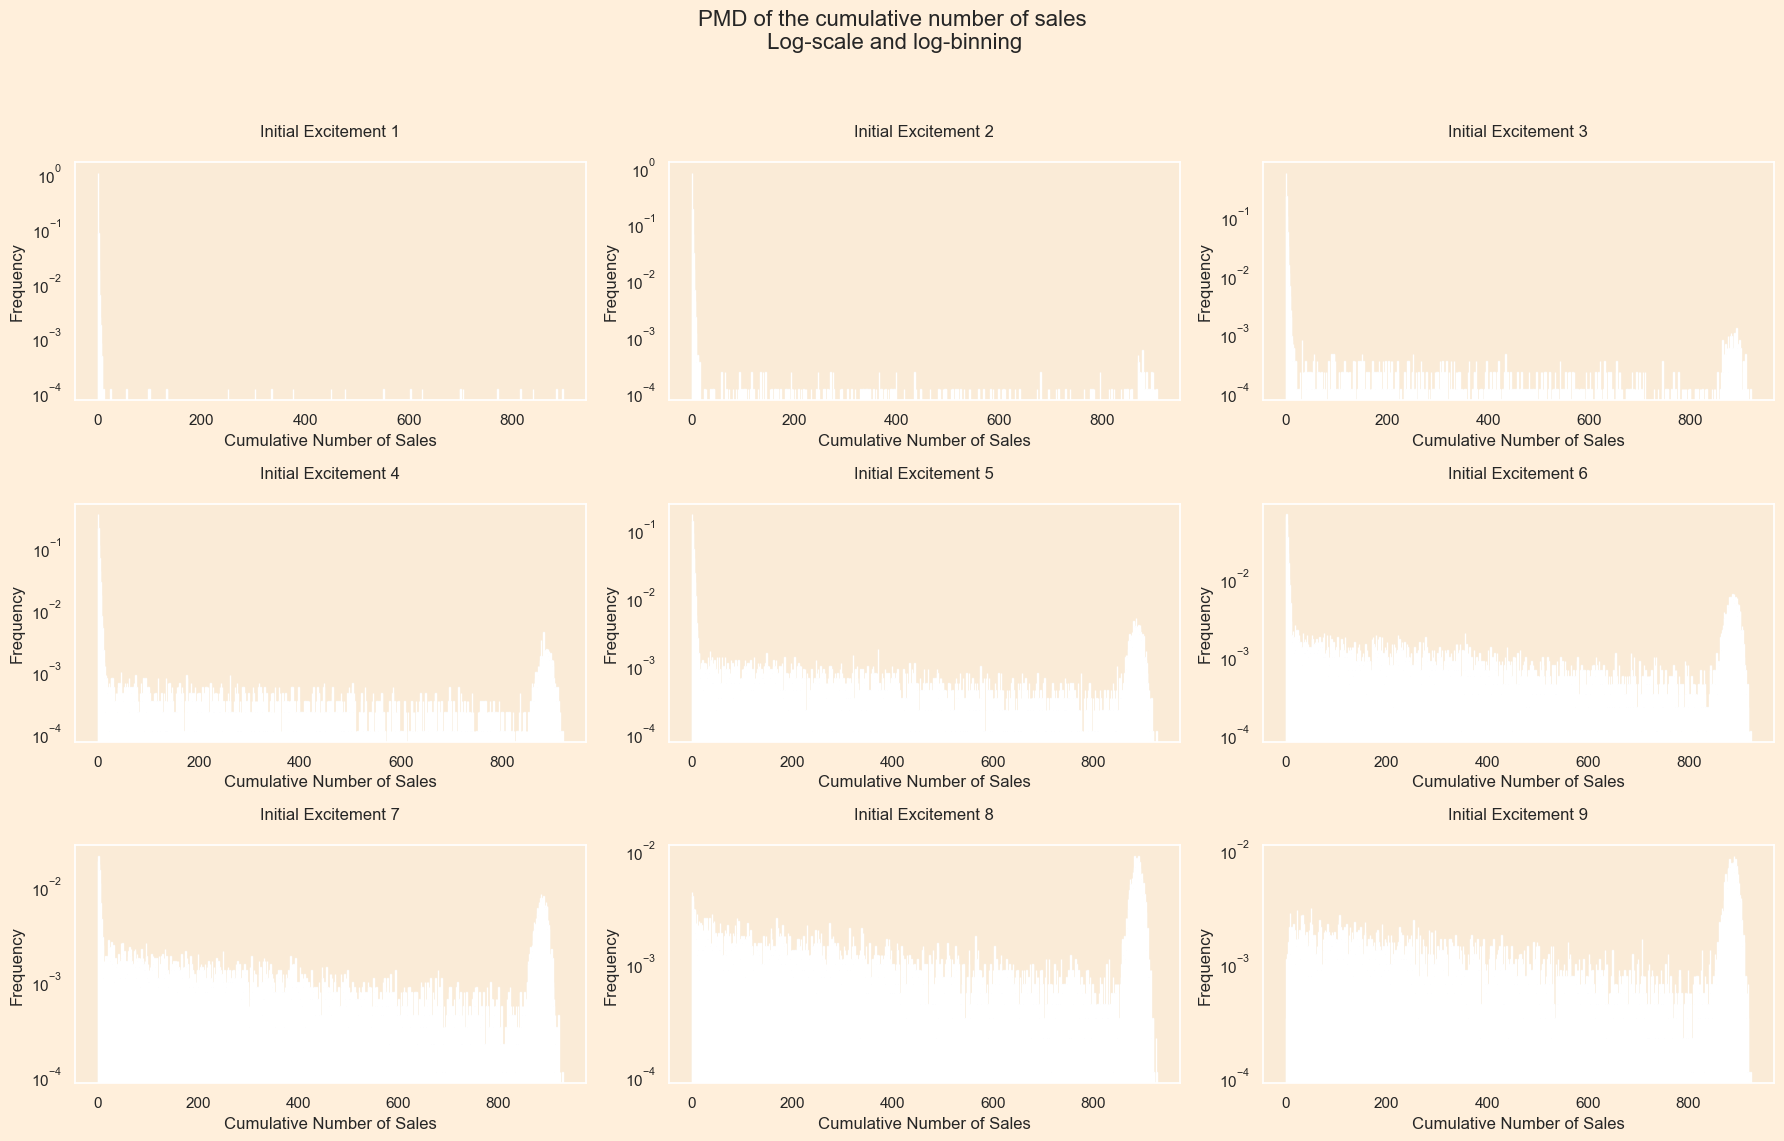

In [4]:
means=hist_plot()

----
----
### Point c

>For each different initial level, compute the average (over the 10 000 trials)
number of carpets the salesman can sale within the given time T. Plot these average
numbers of carpets as a function of the salesman’s initial level of excitement



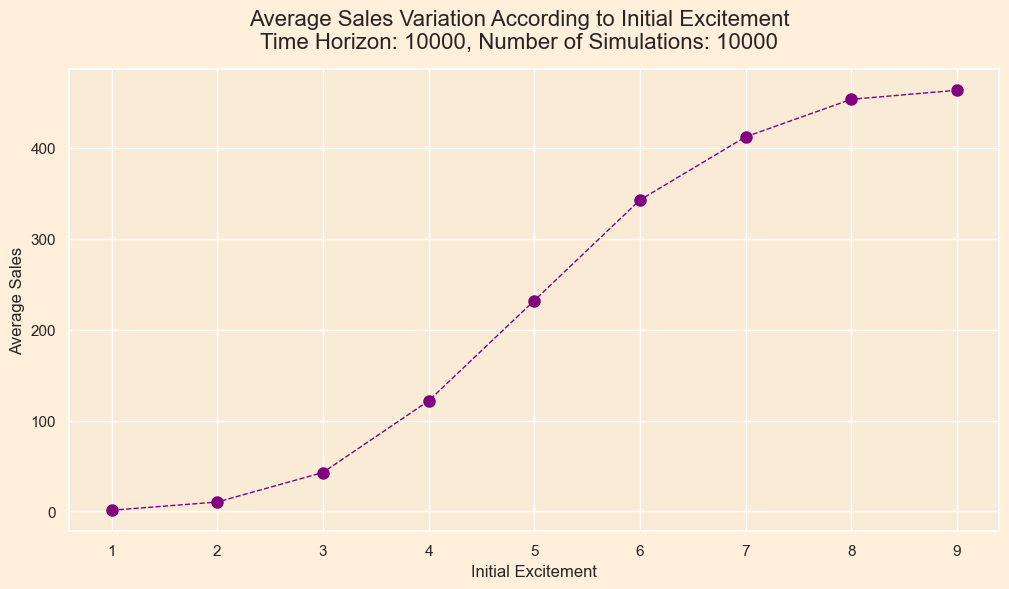

In [5]:
# Create a figure for the plot
plt.figure(figsize=(12, 6))

x_values=np.arange(1, len(means) + 1)

# Plot the data
plt.plot(x_values, means,linestyle='--' ,
         color='purple',marker='o',markersize=8,linewidth=1)  # X-axis: Initial Excitement, Y-axis: Average Sales


plt.xlabel('Initial Excitement')
plt.ylabel('Average Sales')
plt.suptitle('Average Sales Variation According to Initial Excitement\nTime Horizon: 10000, Number of Simulations: 10000', fontsize=16)

plt.xticks(x_values)
# Display the plot
plt.show()

----
----
### Point d

>) (3 p) Compute and plot the PMFs for time (the number of steps) required
for the salesman to sell 5 carpets. Exclude the runs that ended up without selling at
least 5 carpets. At sufficiently high initial levels of excitement the PMFs should start
showing a definite functional form. (1 p) Choose appropriate scale (axes) for plotting
so that you can name this functional form – and name it. (Use this scale for all plots
in d).)

Now we create a new functions that are similar to the ones of point 'b'. 

In [6]:
def steps_to_sell(current_state=9, carpet_bound=5, time_horizon=1000):
    """
    Counts the number of steps required to reach a certain number of carpets.

    Parameters:
    current_state (int): Initial excitement level (default is 9).
    carpet_bound (int): The number of carpets to reach (default is 5).
    time_horizon (int): Maximum time allowed for counting steps (default is 1000).

    Returns:
    int: Number of steps required to reach the carpet_bound or 3 * time_horizon if not reached.
    """
    sales = 0
    t = 0

    while t < time_horizon and sales < carpet_bound:
        # If we enter the loop, it means sales < 5, so if we get 0, we have finished
        if current_state == 0:
            return 3 * time_horizon #this statemant is useful for last point

        birth = sell_prob[current_state]
        death=1-birth

        step = np.random.choice([-1, +1], p=[death, birth])

        current_state = min(9, current_state + step)

        if step == 1:
            sales += 1

        t += 1

    if sales >= carpet_bound:
        return t

    # Note: I'll return for every sale that doesn't bring to 5 carpets, but all runs were made
    return 3 * time_horizon

def sell_time_simulations(initial_state=9, carpet_bound=5, time_horizon=1000, num_simulations=10000):
    """
    Simulates the time required to sell a certain number of carpets for multiple runs.

    Parameters:
    initial_state (int): Initial excitement level (default is 9).
    carpet_bound (int): The number of carpets to reach (default is 5).
    time_horizon (int): Maximum time allowed for each simulation (default is 1000).
    num_simulations (int): Number of simulations to run (default is 10000).

    Returns:
    list: List of times required to sell carpets in each simulation where sales occurred.
    """
    time_evolution = []

    for j in range(num_simulations):
        steps = steps_to_sell(current_state=initial_state, carpet_bound=carpet_bound, time_horizon=time_horizon)
        if steps > 0 and steps < time_horizon + 1:
            time_evolution.append(steps)
            #with this filter i'll avoid to store all values corresponding to
            #cases in which less than 5 carpets were sold

    return time_evolution


def hist_plot_time(time_horizon=1000, carpet_bound=5, num_simulations=10000):
    """
    Generates and plots histograms of time required to sell a certain number of carpets for different initial excitement levels.

    Parameters:
    time_horizon (int): Maximum time allowed for each simulation (default is 1000).
    carpet_bound (int): The number of carpets to reach (default is 5).
    num_simulations (int): Number of simulations to run for each excitement level (default is 10000).
    
    Returns:
    list of average time.
    """

    plt.figure(figsize=(18, 12))
    plt.suptitle(f'Probability Mass Density (PMD) of Time required to sell {carpet_bound}\n Log-scale and Log-binning', fontsize=16)
    
    avg=[]
    
    for i in range(9):
        plt.subplot(3, 3, i+1)
        
        # Run simulations for the current excitement level
        times = sell_time_simulations(initial_state=i+1, carpet_bound=carpet_bound, time_horizon=time_horizon, num_simulations=num_simulations)

        avg.append(np.mean(times))
        
        # Plot histogram bars with log-binning
        bins = np.logspace(np.log10(min(times) + 1), np.log10(max(times)), 30)
        y, edges = np.histogram(times, bins, density=True)
        
        plt.bar(edges[:-1], y, alpha=0.7)
        plt.yscale('log')
        plt.xscale('log')
        
        plt.xlabel('Time')
        plt.ylabel('Frequency')
        plt.title(f'Initial Excitement {i+1}')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    
    return avg

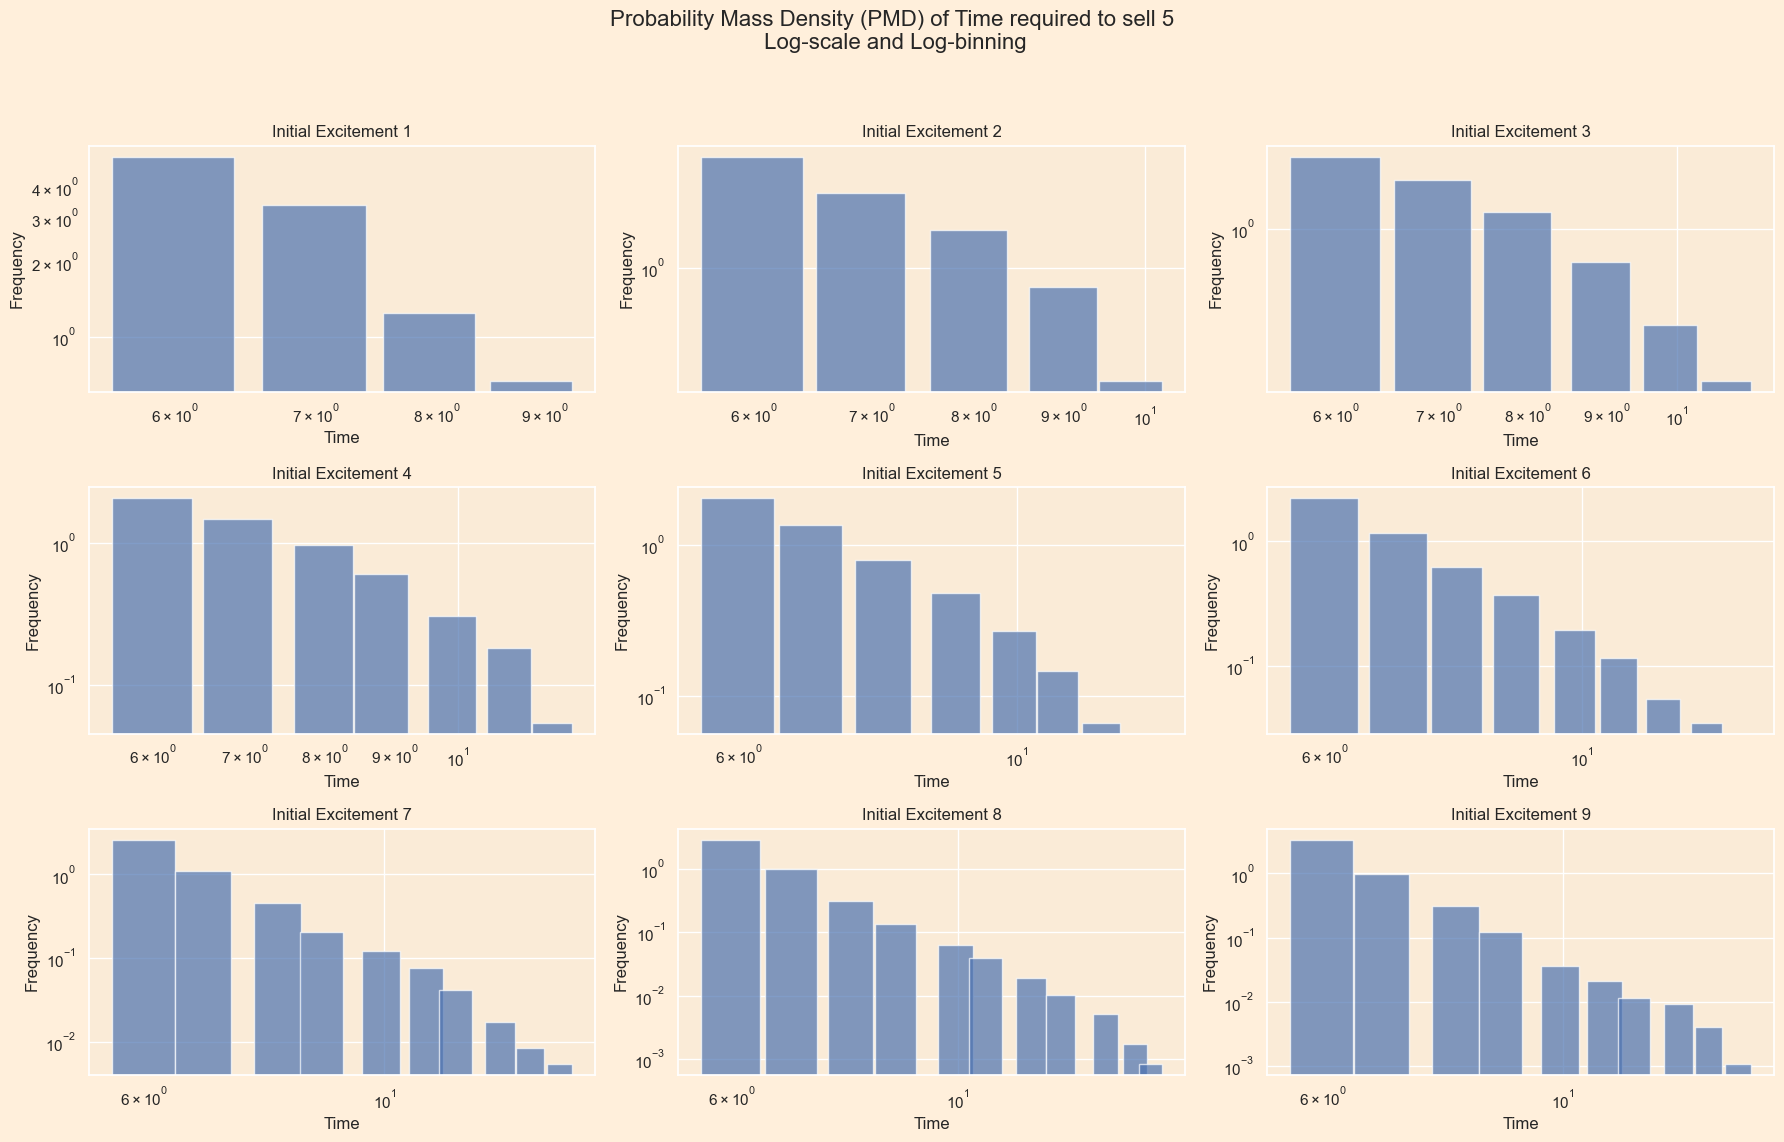

In [7]:
avg_time=hist_plot_time()

The distribution exhibits a linear trend when plotted on a log-scale (x,y) axis, which strongly suggests a decreasing **power-law** form for the data.

Infact, if $y=a x^q$, by using log-scaling($u=\log y$ and $v=\log x$), we have $$v=\log a + uq\text{,}$$
so a linear function.

However we should also consider that we are understimating the number of steps.

----
----
### Point e

>(2 p) Compute the average times (for the different initial levels) it takes for the
salesman to sell 5 carpets. Plot these times as a function of the salesman’s initial level
of excitement

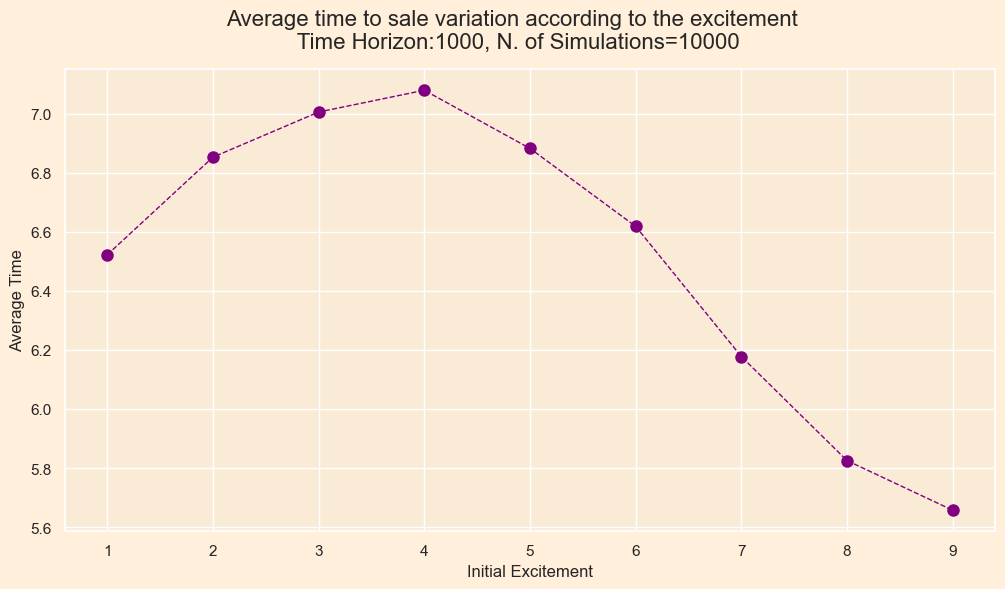

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(x_values,avg_time,linestyle='--' ,
             color='purple',marker='o',markersize=8,linewidth=1) 

plt.xlabel('Initial Excitement')
plt.ylabel('Average Time')
plt.xticks(x_values)

plt.suptitle('Average time to sale variation according to the excitement \n Time Horizon:1000, N. of Simulations=10000', fontsize=16)
plt.show()

Note that the reasonable values are the ones with initial excitement>7.

----
----
### Point f

> In point d) and e), excluding the runs that didn’t sell enough carpets is
underestimating the number of steps needed to sell 5 carpets. Plot the probability of
selling less than 5 carpets in T timesteps as a function of the initial level of
excitement.

I'm going to create a function similar to  that will allow us to calculate the probability of a certain event. Additionally, I'll be using the previously defined function `step_to_sell`. In fact this function return $1001$ We will use the following technique:

$$
\mathbb{P} = \frac{\# \text{{Favorable Cases}}}{\# \text{{Possible Cases}}} = \frac{\# \text{{Simulations Leading to less than five Carpets Sale}}}{\# \text{Number of simulations}}
$$

In [9]:
def probability_computing(initial_state=9, time_horizon=1000, num_simulations=10000, carpet_bound=5):
    """
    Computes the probability of reaching a certain number of carpet sales within a time horizon using simulations.

    Parameters:
    initial_state (int): Initial excitement level (default is 9).
    time_horizon (int): Maximum time allowed for each simulation (default is 1000).
    num_simulations (int): Number of simulations to run (default is 10000).
    carpet_bound (int): The number of carpets to reach (default is 5).

    Returns:
    float: Probability of not reaching at least carpet_bound sales within the time horizon.
    """

    successes = 0
    
    for j in range(num_simulations):
        a = steps_to_sell(current_state=initial_state, time_horizon=time_horizon)
        if a <=time_horizon:
            successes += 1
        
    return 1-successes / num_simulations

In [10]:
# Create an array to store probabilities
probabilities = np.zeros(9)
# Calculate probabilities for each initial state
for i in range(9):
    probabilities[i] = probability_computing(initial_state=i + 1)
# Print the computed probabilities
print(probabilities)

[0.9954 0.9647 0.8715 0.6847 0.4408 0.2157 0.073  0.0158 0.0045]


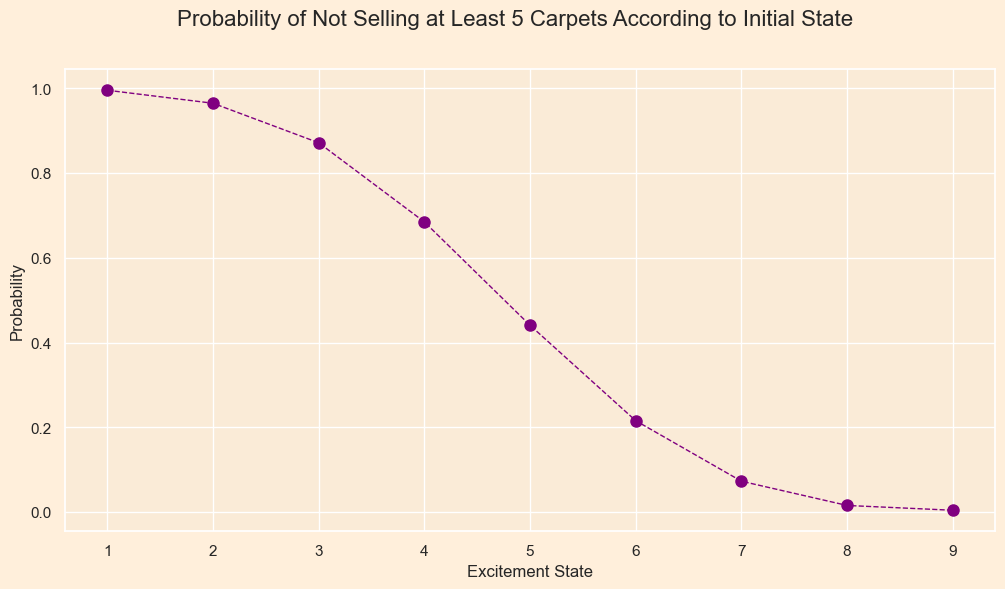

In [11]:
# Create a figure for the plot
plt.figure(figsize=(12, 6))
plt.suptitle(f'Probability of Not Selling at Least 5 Carpets According to Initial State', fontsize=16)

plt.plot(x_values, probabilities,linestyle='--' ,
         color='purple',marker='o',markersize=8,linewidth=1)  # X-axis: Excitement State, Y-axis: Probability

plt.xticks(x_values)

plt.xlabel('Excitement State')
plt.ylabel('Probability')

plt.show()

----
----
### Point g

> you obtained some definite functional form(s) for certain level(s) of initial
excitement. Why does the current process produce these functional forms? (If you
did not get these forms, you can still argue for them based on what you know.)

The observed power-law-like distribution in the simulation results from the complex interplay of various factors within the process. Specifically, the simulation follows a birth and death process but these transition probabilities are non-uniform, depending on the current excitement level.

This means that, depending on the initial excitement level, the salesman has varying probabilities of making a sale or experiencing a failure. This non-uniformity in transitions is a key factor contributing to the power-law-like distribution in the time required to sell a certain number of carpets.

Furthermore, this complexity within the process, coupled with the probabilistic nature of sales interactions, leads to a range of possible outcomes. This results in the emergence of a distribution where rare events, such as long sequences of consecutive rejections or exceptional successes, have a significant impact on the time needed to achieve the desired sales target.

In summary, the power-law-like distribution is a consequence of the non-uniformity in birth and death transitions within the simulation process, alongside the complexity and randomness of sales interactions. This renders the system's behavior intricate and challenging to predict, with rare sequences of events exerting substantial influence on the time required to reach sales goals.


**Interpretation**

The observation of a clearer power-law distribution for higher excitement levels may indeed be related to the concept of an explosive Markov chain. An explosive Markov chain is a Markov chain in which the process can potentially continue indefinitely without ever reaching a stable state. This characteristic can lead to fat-tailed distributions, including power-law-like behavior.

----
----
----
----
----
----

## Exercise 2

> Let’s take the Poisson process to describe radioactive decay. The number of nuclei is
initially $T_0 = 10000$. The nuclei decay (fission) at rate $\lambda = 0.2$ per second. We want to
determine the half-time $t_{1⁄2}$, that is, the time it takes on average for the number of nuclei
to decay to $N(t) = N_0⁄2$. You can do this simulation in two ways, the first of which is
what a statistician would do and that is presented in Lecture 3. There is an alternative way
based on simulating the stochastic process in time steps, which is what for example a
physicist would do. In this second way you should first run simulations to find appropriate
time interval (time step) but let’s pretend you have already done this and found that
$\Delta t = 0.01 s$.

**Explanation of Radioactive Decay and Half-Life**

In the context of radioactive decay, we can consider each nucleus in a radioactive sample as undergoing an independent decay process, and the time it takes for each nucleus to decay follows an exponential distribution. This concept is fundamental to understanding the behavior of radioactive substances and is often used to determine the half-life.

**Independent Decay of Nuclei**

In a radioactive sample, each individual nucleus behaves independently, meaning that the probability of one nucleus decaying is not influenced by the state of other nuclei in the sample. This independence leads to the following observations:

- Each nucleus has an equal probability of decaying at any given moment.
- The time until an individual nucleus decays follows an exponential distribution.

**Exponential Distribution**

The exponential distribution is commonly used to model the time between successive events in a Poisson process. In the case of radioactive decay, the "event" is the decay of a nucleus. The probability density function of the exponential distribution is given by:

$$f(t) = \lambda \mathrm{e}^{-\lambda t}$$

Where:
- $\lambda$ is the rate of decay (in this context, $\lambda$ represents the decay rate per unit time).
- $t$ is the time.

**Minimum of Exponentials**

When dealing with multiple independent exponential processes (nuclei decaying independently), we can find the time of the first decay event by taking the minimum of these exponential random variables. Mathematically, if you have $N_k$ nuclei at a particular time $k$, then the time until the next decay event for this group of nuclei follows an exponential distribution with a rate of $N_k\lambda$.

**Rate-Time Dependence**

As correctly pointed out, the decay rate $\lambda_k$ is time-dependent. It increases as more nuclei decay. To simulate this process, a time step $\Delta t$ is introduced, allowing us to model the evolution of the system over time.

This stochastic modeling approach aligns with the statistical interpretation of radioactive decay and is commonly used to estimate the half-life of a radioactive substance. The half-life can be calculated using the formula:

$$t_{1/2} = \frac{\log(2)}{\lambda}=3.465$$

Where $t_{1/2}$ is the half-life, and $\lambda$ is the decay rate. The calculated half-life provides valuable insights into the behavior of the radioactive substance.

In [12]:
#constants
rate=0.2#decay rate
N0=10000#initial number of nuclei
time_step = 0.01

In [13]:
#functions
def simulate_decay_stat(rate=rate, N0=N0):
    """
    Simulate radioactive decay process and estimate the half-life as a statistican would do.

    Parameters:
    rate (float): Decay rate per second.
    N0 (int): Initial number of nuclei.

    Returns:
    X (list): List of event times.
    estimated_half_life (float): Estimated half-life in seconds.
    """

    N = N0  # Current number of nuclei
    current_time = 0  # Initialize the current time to zero
    X = []  # Initialize a list to store event times

    # Simulate radioactive decay until half of the nuclei remain
    while N > N0 / 2:
        # Generate an exponentially distributed interarrival time
        interarrival_time = expovariate(N*rate)#exponential race

        current_time += interarrival_time

        # Decrease the remaining nuclei count by 1
        N -= 1

        # Append the current time to the list of event times
        X.append(current_time)
        
        #print(current_time)

    # Estimate the half-life as the time when half of the nuclei have decayed
    estimated_half_life = current_time

    return X, estimated_half_life


def simulate_decay_phy(rate=rate, N0=N0, time_step=time_step):
    """
    Simulate radioactive decay process and estimate the half-life as a physicist would do.

    Parameters:
    rate (float): Decay rate per second.
    N0 (int): Initial number of nuclei.
    time_step (float): Specified time step in seconds.

    Returns:
    event_times (list): List of event times.
    estimated_half_life (float): Estimated half-life in seconds.
    """
    # Initialize time, remaining nuclei count, and event times list
    time = 0
    remaining_nuclei = N0
    event_times = []
    
    # Calculate the decay probability for this time step
    decay_prob = 1 - np.exp(-rate * time_step)

    # Continue the simulation until half of the nuclei have decayed
    while remaining_nuclei > N0 / 2:
        # Simulate decay for all nuclei in one step using vectorized operations
        decayed_indices = np.random.rand(remaining_nuclei) < decay_prob
        decayed_count = np.sum(decayed_indices)
        
        # Update the remaining nuclei count
        remaining_nuclei -= decayed_count
        
        # Record the event times for the nuclei that decayed
        event_times.extend([time] * decayed_count)
        
        # Advance time
        time += time_step

    # Calculate the simulated half-life
    simulated_half_life = time

    return event_times, simulated_half_life

----
----
### Point a
>(3 p) Implement the algorithm to simulate radioactive decay by both methods.

**Statistican style**

In [14]:
# Call the function to simulate decay
X_stat, estimated_half_life_stat = simulate_decay_stat()

# Print the estimated half-life
print(f"Estimated half-life: {estimated_half_life_stat:.2f} seconds")

Estimated half-life: 3.48 seconds


**Physicist style**: 

In this second way you should first run simulations to find appropriate
time interval (time step) but let’s pretend you have already done this and found that
$\Delta t = 0.01 s$.

In [15]:
X_phy, estimated_half_life_phy = simulate_decay_phy(rate, N0, time_step)
print(f"Estimated half-life: {estimated_half_life_phy:.2f} seconds")

Estimated half-life: 3.51 seconds


----
----
### Point b
> (2 p) Determine the mean and variance for $t_1⁄2$ that you get by averaging over 100
simulations.

In [16]:
def simulations_decay(num_sim=100, rate=0.2, N0=10000, time_step=0.01, method=None):
    """
    Simulate radioactive decay process multiple times and estimate mean and variance of half-lives.

    Parameters:
    num_sim (int): Number of simulations to run.
    rate (float): Decay rate per second.
    N0 (int): Initial number of nuclei.
    time_step (float): Specified time step in seconds.
    method (str): Method for simulation ('phy' for physical model, None for default).

    Returns:
    mean (float): Mean estimated half-life.
    var (float): Variance of estimated half-lives.
    """

    estimated_half_life = np.zeros(num_sim)

    if method == 'phy':
        for i in range(num_sim):
            _, estimated_half_life[i] = simulate_decay_phy(rate=rate, N0=N0, time_step=time_step)
    else:
        for i in range(num_sim):
            _, estimated_half_life[i] = simulate_decay_stat(rate=rate, N0=N0)

    mean = np.mean(estimated_half_life)
    var = np.var(estimated_half_life)

    return mean, var

In [17]:
print('As statistican would do')
mean_stat,var_stat=simulations_decay()
print('Mean:',mean_stat,'\nVariance',var_stat)

As statistican would do
Mean: 3.4649290745798402 
Variance 0.0028509890486295205


In [18]:
print('As physician would do')
mean_phy,var_phy=simulations_decay(method='phy')
print('Mean:',mean_phy,'\nVariance:',var_phy )

As physician would do
Mean: 3.46319999999997 
Variance: 0.0027317599999998835
